# Project: Food and Nutrition - Spring 2022
-----------------------------------------------
**OPIM 5512: Data Science Using Python - University of Connecticut**
The purpose of this project is to assess your skills on data wrangling and pre-processing, data wrangling, modeling, evaluation and technical communication. 

You will do this by exploring a comprehensive dataset on food items, their nutritional attributes, and how they are related to CHOLESTEROL. 

# Introduction (2.5 pts)

Read the following websites related to the dataset 
* https://corgis-edu.github.io/corgis/csv/food/
* https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
* https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf

Write at least five sentences about you are doing in this notebook. You may want to write this at the very end after you complete your analysis. Add a nice picture or two take make your notebook look nice. 

List your group number and name of each project member.

## Description of Notebook

Food and nutrition help our bodies gain the energy it needs to function and keep running. Every food that we eat packs different kinds of nutrients in it. Some have good effects, and some have bad effects. A healthy diet is one that has a balance of all the nutrients that are vital to the human body.

Through this dataset, we are planning to analyze the nutrition levels of various categories of foods and share our insights on some of the nutrients that are most effective on the human body. We are also trying to analyze foods rich in fiber and niacin that will help cut the bad cholesterol. We are also analyzing foods with high vitamin levels, since vitamins are useful for pregnant women and adults over 50 years. We plan to recommend an effective diet plan to maintain a healthy lifestyle. Using the data, we will build a model to predict the cholesterol level of various food categories and identify the most harmful foods. 

<img src = 'https://th.bing.com/th/id/R.0b41d64e94f72e3e1a7a797e0142cd3a?rik=r%2bHcU4Mdri5fcg&riu=http%3a%2f%2fwww.paslabs.co.uk%2fwp-content%2fuploads%2f2017%2f06%2fshutterstock_54212218-copy.jpg&ehk=OlC3Y7Ppl1Pef6BMpUl73A8g6F9BzK8Hx75Rwbw92jc%3d&risl=&pid=ImgRaw&r=0'>

# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures
# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Read Data from Website (2.5 pts)
* Read data from the website and print the shape
* Use Python to count how many nutrients there are (including cholesterol).

In [ ]:
# read the data
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head(40)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
6,Milk,"Milk, calcium fortified, fat free (skim)",11111170,0,0,0,4.85,2,16.0,0.0,...,101,166,52,0.40,137,0.38,0.040,1.0,0.01,0.0
7,Milk,"Milk, reduced fat (2%)",11112110,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2
8,Milk,"Milk, acidophilus, low fat (1%)",11112120,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
9,Milk,"Milk, acidophilus, reduced fat (2%)",11112130,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

## Printing the shape of df.

In [ ]:
# Print the shape of the dataframe
print(df.shape)

(7083, 38)


## Using python to count how many nutrients there are.

In [ ]:
# looking at the head, we observe all nutrients start with the string "Data."
# we can then create a series of the column names then count the occurances of that particular string
series = pd.Series(df.columns) 
Nutrients = series.str.startswith("Data.")
print("There are",np.sum(Nutrients),"nutrients.")

There are 35 nutrients.


# Random Sampling (2.5 pts)
Take a random sample according to your Group Number (as given in HuskyCT).

* Shuffle the dataframe with a random seed equal to your group number, and then take a random sample of 90% of the original data without replacement (using your group number the random seed).

## Creating a Random Sample

In [ ]:
# generating a sample of 90% size, random state 21 and without replacement
df_samp= df.sample(replace=False, random_state=21, frac=.9)
print(len(df_samp)/len(df)) # checking sample size
print(df_samp.shape) # checking shape
df_samp # taking a peek
df = df_samp # recoding our sample as df to be used moving forward

0.9000423549343498
(6375, 38)


# Missing Values (5 pts)
Show two different ways of checking for missing values per column (you can use `.info` as one of them.) If there are missing values, impute them and provide motivation for why you are imputing. If there are no missing values, move on.

## Method #1

In [ ]:
# using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 1493 to 690
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                     

##Method #2

In [ ]:
# using .isna and summing the count to get a total for each variable
df.isna().sum()

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Beta Carotene                0
Data.Beta Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein and Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monosaturated Fat        0
Data.Fat.Polysaturated Fat        0
Data.Fat.Saturated Fat            0
Data.Fat.Total Lipid              0
Data.Major Minerals.Calcium       0
Data.Major Minerals.Copper        0
Data.Major Minerals.Iron          0
Data.Major Minerals.Magnesiu

# Literature Review and Basic EDA (23 pts)



## Lit review (10 pts)
There is wonderful information on each of the nutrients here:
* https://corgis-edu.github.io/corgis/csv/food/

Tell a story about different food products and their cholesterol values - what do they have in common? What foods are high in cholesterol? Which nutrients are most correlated with cholesterol? Back your analysis up with at least 10 citations - cite them inline [1] and also as a list below so we know where you got the source.

**Citations**
1. "How to Calculate Net Carbs for Keto in 2 Simple Steps" (https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps)


##Eating To Live Longer
  The rule of threes in survivial states that a human dies after: three minutes without oxygen, three hours without shelter, three days without water or three weeks without food. This rule indicates that nourishment is the fourth most critical pillar of life. Throughout centuries of human-life, food has transformed from merely a means of survival and into something that many people draw great joy from, people identify with food, they define themselves and their cultures with food. Ignoring all of its extra merits food is meant to nourish us and keep us alive. So why not take that to the next level and figure out what foods will keep us alive the longest and what foods kill us the quickest. Nothing demonstrates this yin and yang like existance than cholesterol, something so crucial to life but when it reaches too high a concentration it can kill. 

  This feels like a logical extension of the data set because cholesterol is directly linked to heart disease. The CDC highlights "having high blood cholesterol raises the risk for heart disease, the leading cause of death, and for stroke, the fifth leading cause of death (High Cholesterol Facts)." The CDC indicates nearly 700,000 people die each year from heart disease, when contrasted with the total deaths from COVID since February 2020, (2 years) COVID has killed 960,000 people (Covid in the U.S.). Heart disease is far more deadly than COVID. So if you want to have any chance at getting out of life alive, you must know what cholesterol is but, as the CDC notes, high cholesterol has no symptoms. The American Heart Association describes "Cholesterol is a waxy substance" produced by ones own liver and ingested when humans eat "foods from animals (What is Cholesterol)." Really, there are two types of Cholesterol, LDL cholesterol and HDL cholesterol. LDL is the bad cholesterol and HDL is the good cholesterol. Our food data only contains a data field for cholesterol, it does not choose specify which type of cholesterol. The Harvard Health Publishing indicates that "HDL clears from the body via the liver" and advises its readers that someone who desires to attain a healthy HDL cholesterol level should "[adopt] a heart-healthy diet low in fat and high in fiber. (Cholesterol: Understanding HDL vs. LDL)" This is a very helpful insight as our data set has a fiber field and multiple fat indicators. <strong>We should look into foods that has high cholesterol, high fiber and low fat.</strong>. The same article indicates that LDL cholesterol is found in "diet[s] rich in red meat, full-fat dairy, saturated fat, trans fats, and processed foods can lead to high LDL cholesterol." <strong>We should isolate red meats and other foods high in fat, low in fiber and high in cholesterol.</strong> 

This information gives a good foundation for what to look for to find foods with good levels of cholesterol. Cholesterol is found in food from animals, so what animal products contain healthy cholesterol levels. Through my reading I set out to find the best atlernatives to the american red meat diet, all of the diets that claim to result in a longer life. It may not be as simple as avoiding red meat or any specific food in general. Even the way beef is raised can change the cholesterol levels of the food, the WebMD Editorial contributors indicate that "lean meat, such as grass-fed beef, has been shown to actually have a positive effect on cholesterol levels (Grass-Fed Beef: Is It Good for You?)." 

Two things in life are certainties: death and taxes. If you want to set the world record for living the longest I believe you will need to stick to an extreme diet and some of the analysis we do here should be able to help you achieve this goal. If you're trying to *live* life, listen to your doctor, but have that ribeye, big mac or ice cream sandwich every once and awhile. 


**Citations**
1. "Wilderness Survival Rules of 3 – Air, Shelter, Water and Food" (https://www.backcountrychronicles.com/wilderness-survival-rules-of-3/)

2. "High Cholesterol Facts" (https://www.cdc.gov/cholesterol/facts.htm#:~:text=Having%20high%20blood%20cholesterol%20raises,fifth%20leading%20cause%20of%20death)

3. "Heart Disease Facts" (https://www.cdc.gov/heartdisease/facts.htm#:~:text=One%20person%20dies%20every%2036,United%20States%20from%20cardiovascular%20disease.&text=About%20659%2C000%20people%20in%20the,1%20in%20every%204%20deaths)

4. "COVID In The U.S." (https://www.nytimes.com/interactive/2021/us/covid-cases.html)

5. "What is Cholesterol" (https://www.heart.org/en/health-topics/cholesterol/about-cholesterol)

6. "Cholesterol: Understanding HDL vs. LDL" (https://www.health.harvard.edu/blog/understanding-cholesterol-hdl-vs-ldl-2018041213608)

7. "What meats and meat alternatives are low in cholesterol?" (https://www.medicalnewstoday.com/articles/low-cholesterol-meats#lowering-cholesterol)

8. "20 Foods You Should Be Eating Every Day for a Longer Life" (https://www.eatthis.com/foods-live-longer/)

9. "Know Your Food Groups" ("https://www.nia.nih.gov/health/know-your-food-groups#:~:text=A%20healthy%20eating%20pattern%20includes,%2C%20dairy%20products%2C%20and%20oils.")

10. "Vitamins supplements don't help people live longer, sutdy finds" (https://www.nbcnews.com/health/health-news/certain-nutrients-can-help-people-live-longer-only-if-they-n992266)

11. "Cholesterol is arguably one of the most misunderstood substances." (https://www.healthline.com/nutrition/high-cholesterol-foods#foods-to-eat)

12. "The Longevity Diet: What to Eat So You Live Longer and Healthier" (https://www.health.com/nutrition/longevity-diet)

13. "Grass-Fed Beef: Is It Good for You?" (https://www.webmd.com/diet/grass-fed-beef-good-for-you#:~:text=Lean%20meat%2C%20such%20as%20grass,positive%20effect%20on%20cholesterol%20levels.&text=Studies%20have%20found%20that%20grass,acids%20than%20feed%2Dlot%20beef.)

14. "Is a High Fiber or High Protein Diet Better For You?" https://healthyeating.sfgate.com/high-protein-vs-high-fiber-8221.html



## Unique values from `Category` (3 pts, 1 pt each)
* Count how many unique values are in `df['Category']`
* Make a frequency table of how many entries exist per `df['Category']`. Which categories are most common?
* Make a histogram from the frequency table you just calculated. Don't be afraid to play with x and y limits, and make sure you have nice titles and labels.

### Number of Unique Values

In [ ]:
# using .nunique to show the distinct values in Category
df['Category'].nunique()

2245

### Frequency Table

In [ ]:
# using .value_counts to show the frequency of eash value in Category
df['Category'].value_counts()

Infant formula                                      155
Rice                                                130
Bread                                               100
Potato                                               93
Cookie                                               91
                                                   ... 
Chili con carne with chicken or turkey and beans      1
Turkey or chicken and beef sausage                    1
Tiramisu                                              1
Vanilla wafer dessert base                            1
Turkey stick                                          1
Name: Category, Length: 2245, dtype: int64

### Histogram of top 50 categories

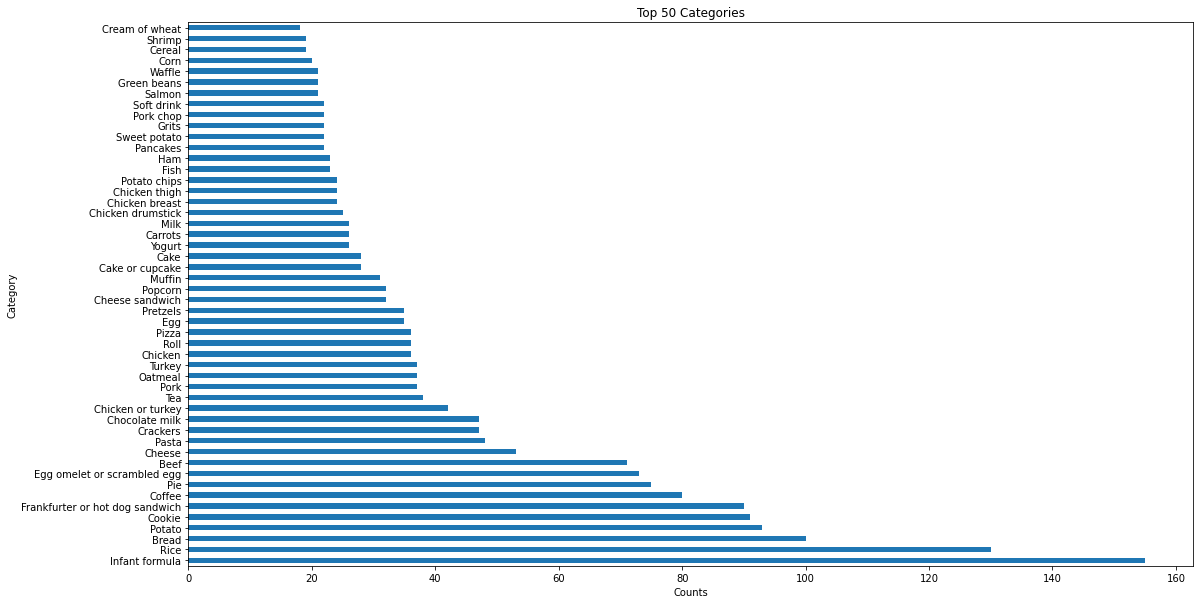

In [ ]:
df['Category'].value_counts()[:50].plot(kind='barh',figsize=(18, 10))
plt.title('Top 50 Categories')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

## Correlation (5 pts, 1 pt each)
Try making different correlation matrices - when you have more than 10 variables it can be hard to read, so let's start big and then simplify. 

* make one for the entire dataset (this one should be hard to read)
* make four more correlation matrices that only contain:
  * fat-related
  * major minerals-related
  * vitamins-related
  * none of the above ('Alpha Carotene' through and including 'Water')

Describe what you see. You are welcome to color-code these plots so they are easy to read.

### Entire Dataset

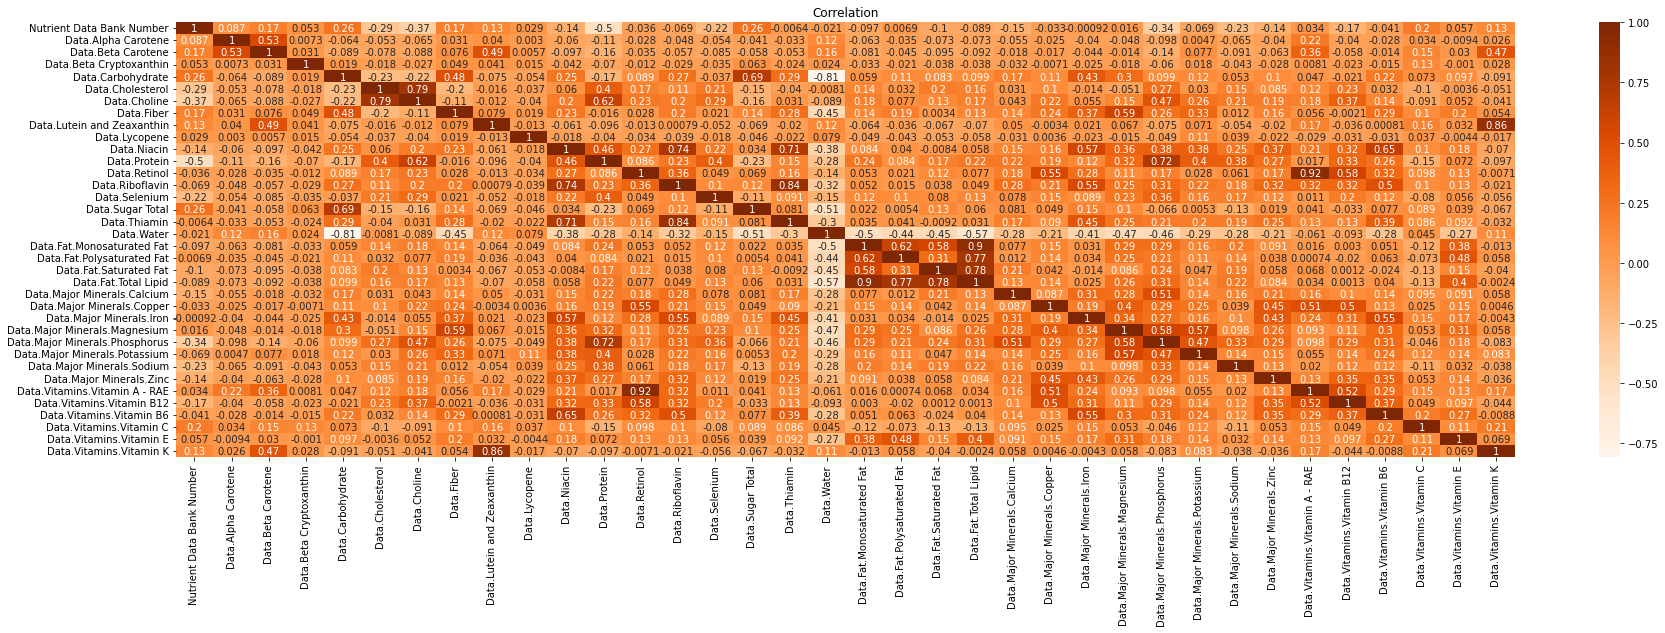

In [ ]:
all=df.iloc[:,3:] # removing non-nutrient columns
all=df.corr() # creating a correlation matrix of the data
plt.figure(figsize=[30,8]) # this plot needed to be large, given the number of variables
sns.heatmap(all, annot=True, cmap = "Oranges")
plt.title('Correlation')
plt.show()

In the overall dataset we see an abundance of relatively weak correlations, both positive and negative. An area that jumps out visually is a section of stronger correlations within the fatty group. We will look at that separately later. Interestingly, water has a negative correlation with the majority of other elements. Here are additional observations that pop out:



*   Water | Carbohydrate | -0.81
*   Vitamin K | Lutein/Zeaxanthin | 0.86
* Vitamin A - RAE | Retinol | 0.92



### Fat-related

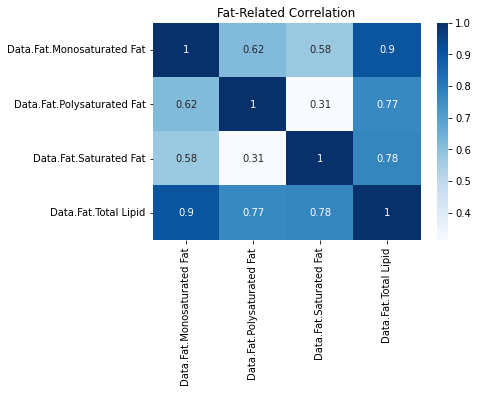

In [ ]:
fats=df.iloc[:,20:24] # subsetting appropriate columns
fats=fats.corr() # creating a correlation matrix of the data
sns.heatmap(fats, annot=True, cmap = 'Blues')
plt.title('Fat-Related Correlation')
plt.show()

Breaking out the fatty group separately we observe stronger, positive correlations. Although, Polysaturated Fat & Saturated Fat don't exhibit quite as strong of a relationship.

###Major minerals-related

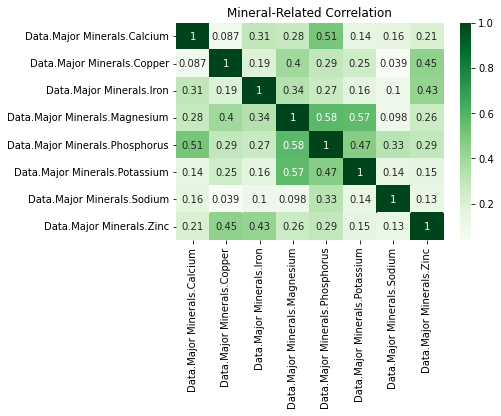

In [ ]:
minerals=df.iloc[:,24:32] # subsetting appropriate columns
minerals=minerals.corr() # creating a correlation matrix of the data
sns.heatmap(minerals, annot=True, cmap = 'Greens')
plt.title('Mineral-Related Correlation')
plt.show()

An interesting observation of the minerals is that all of the correlations are positive. While they are not strong for the most part, the absence of a single negative value could lead us to believe that mineral nutrients stem from a similar source.

### Vitamins-related

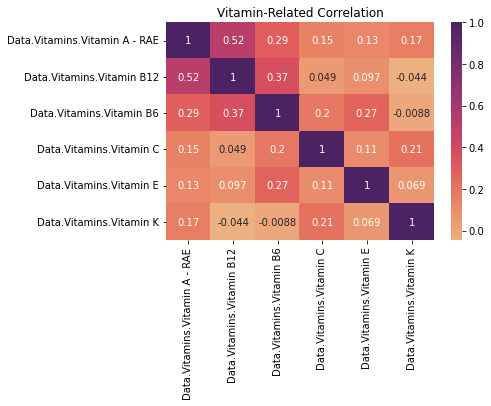

In [ ]:
vitamins=df.iloc[:,32:38] # subsetting appropriate columns
vitamins=vitamins.corr() # creating a correlation matrix of the data
sns.heatmap(vitamins, annot=True, cmap = 'flare')
plt.title('Vitamin-Related Correlation')
plt.show()

Similar to minerals, we see mostly positive correlations of varying strengths with the exception of Vitamin K with the two B-Vitamins, B6 & B12.

###The rest

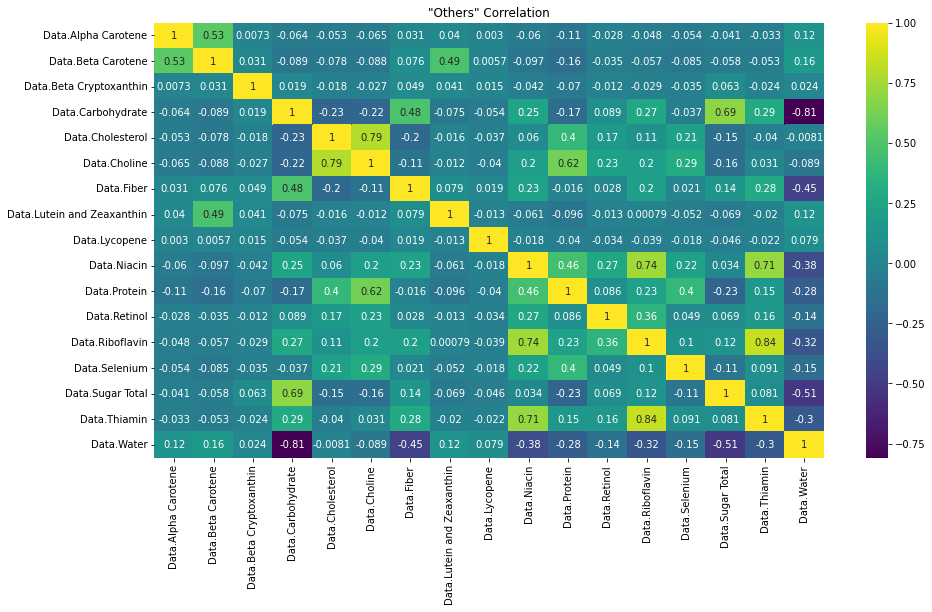

In [ ]:
others=df.iloc[:,3:20] # subsetting appropriate columns
others=others.corr() # creating a correlation matrix of the data
plt.figure(figsize=[15,8]) #needed to make this one bigger
sns.heatmap(others, annot=True, cmap='viridis')
plt.title('"Others" Correlation')
plt.show()

Looking at "the rest" of the nutrients, it is important to observe the correlations with Cholesterol as Cholesterol is the focus of the notebook. The strongest positive correlation of Cholesterol is with Choline (0.79) and the strongest negative correlation is with Carbohydrate (-0.23). Perhaps not all carbs are bad after all....

## Feature Engineering: Net Carbs (5 pts)
Read this article.
* https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps

* Calculate a new feature called `NetCarbs`. (1 pt)
* Is there any relationship between net carbs and cholesterol? Use a plot or table to prove your point. (2 pt)
* Which foods have the lowest net carbs? Which foods have the highest net carbs? What do these foods have in common. (2 pt) 

Support your answer with analysis completed in Python, not just lit review.

### Net Carbs Feature

In [ ]:
# my understanding of net carbs = ['Data.Carbohydrate'] - ['Data.Fiber']
df['NetCarbs'] = df['Data.Carbohydrate'] - df['Data.Fiber']
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
1493,Sturgeon,"Sturgeon, coated, fried",26147140,0,0,1,9.85,86,73.2,0.6,...,283,377,0.68,167,1.81,0.184,0.0,1.56,11.4,9.25
833,Lamb chop,"Lamb chop, NS as to cut, cooked, lean only eaten",23101020,0,0,0,0.00,94,107.4,0.0,...,373,406,4.10,0,2.50,0.159,0.0,0.16,3.9,0.00
891,Deer chop,"Deer chop, cooked",23322300,0,0,0,0.00,73,105.0,0.0,...,370,448,3.37,0,1.70,0.702,0.0,0.95,4.3,0.00
3661,Tamale,"Tamale, sweet",53430700,0,2,2,35.61,0,2.3,2.3,...,73,265,0.49,0,0.00,0.112,0.0,0.77,6.5,33.31
4227,Cereal (General Mills Cheerios Fruity),Cereal (General Mills Cheerios Fruity),57221810,25,38,0,84.19,0,17.5,5.9,...,214,501,13.89,534,5.59,1.850,55.6,0.79,0.9,78.29


### Correlation between NetCarbs and Cholesterol

In [ ]:
netcarb=df.iloc[:,[7,38]]
netcarb=netcarb.corr()
pd.DataFrame(netcarb.iloc[1:,0]) # negative but not too strong

,Data.Cholesterol
NetCarbs,-0.214909


### Highest and Lowest NetCarb Foods

In [ ]:
# Highest... 
large=df.nlargest(10, ['NetCarbs'])
large2=large.iloc[:,[0,1,38]]
print("The 10 foods highest in Net Carbs Are:")
large2

The 10 foods highest in Net Carbs Are:


,Category,Description,NetCarbs
6429,Sugar substitute,"Sugar substitute, stevia, powder",100.00
6431,Sugar substitute,"Sugar substitute, monk fruit, powder",100.00
6424,Sugar,"Sugar, white, confectioner's, powdered",99.77
6423,Sugar,"Sugar, white, granulated or lump",99.60
6422,Sugar,"Sugar, NFS",99.60
6427,Sugar substitute and sugar blend,Sugar substitute and sugar blend,99.35
6602,Gumdrops,Gumdrops,98.80
6621,Dietetic or low calorie mints,Dietetic or low calorie mints,98.60
6879,Fruit flavored drink,"Fruit flavored drink, with high vitamin C, pow...",98.54
6492,Candy,"Candy, NFS",98.00


In [ ]:
# Lowest... 
small=df.nsmallest(10, ['NetCarbs'])
small2=small.iloc[:,[0,1,38]]
print("The 10 foods lowest in Net Carbs Are:")
small2

The 10 foods lowest in Net Carbs Are:


,Category,Description,NetCarbs
833,Lamb chop,"Lamb chop, NS as to cut, cooked, lean only eaten",0.0
891,Deer chop,"Deer chop, cooked",0.0
749,Pork chop,"Pork chop, smoked or cured, cooked, lean only ...",0.0
993,Chicken drumstick,"Chicken drumstick, stewed, skin eaten",0.0
1127,Cornish game hen,"Cornish game hen, cooked, skin eaten",0.0
897,Bison,"Bison, cooked",0.0
1418,Perch,"Perch, steamed or poached",0.0
665,Beef steak,"Beef steak, fried, lean only eaten",0.0
1043,Chicken wing,"Chicken wing, sauteed",0.0
697,Corned beef,"Corned beef, canned, ready-to-eat",0.0


In [ ]:
# Generating a comparison
large.reset_index(drop=True) == small.reset_index(drop=True)


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
0,False,False,False,True,True,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,False,False,False,True,True,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,False,False,False,True,True,True,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False
3,False,False,False,True,True,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
6,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
8,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False


Common nutrients in both low net card and high net carb foods are:


*   Alpha Carotene
*   Beta Carotene
*   Lycopene

We also saw some similarity in:


*   Beta Cryptoxanthin
*   Fiber
*   Lutein & Zeaxanthin




# Advanced EDA (10 pts, 2 pts per item)
This is your chance to show-off your data analysis skills. Create a total of five compelling tables and visualizations (2 pts each) to show you understand how to make amazing plots and tables. You should have two or three tables and two or three visualizations.

Each item you create should have a nice sub-header, the figure or table, and then a nice caption which relates back to your theme of cholesterol. Don't just rattle of a bunch of plots for the sake of making plots - do a great job here. You can use your lit review to motivate the creation of these plots and tables.

## Item 1: Vitamin-rich Foods


Vitamins are critical for us to assist our bodies feature correctly and to maintain excellent health. Vitamins are located in diverse foods, similarly to being obviously synthetic with the aid of using our bodies. However, now and again we want an assist with vitamins in the food we consume. It could be tough to figure out which diet complement to pick. Here, we are creating a dataset that shows the list of vitamin rich foods and can help us pick the food based on the vitamin count.

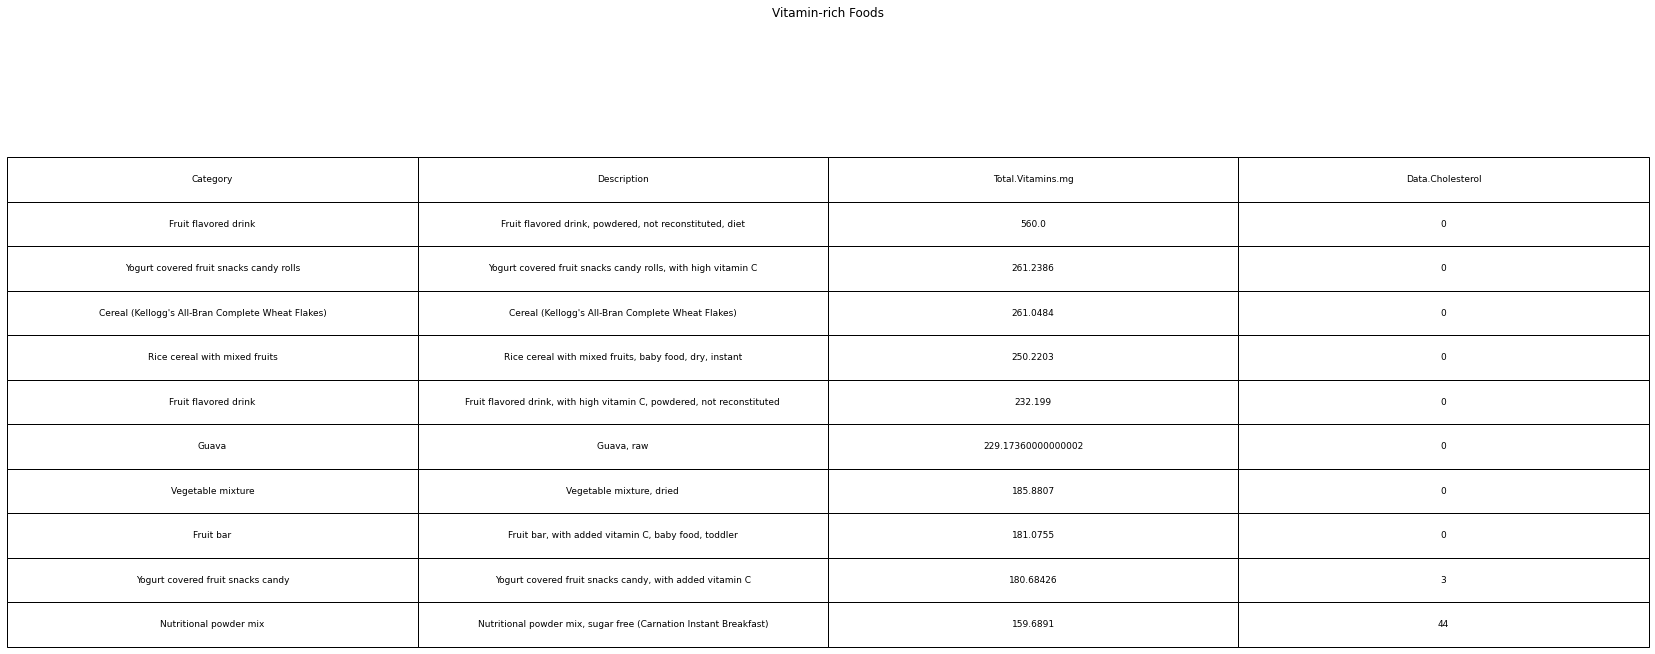

In [ ]:
# B6, C & E are in mg
# A, B12 & K are in mcg
# 1mg = 1000mcg
tmp = df # recoding to tmp to use for section without messing up other sections


# need to separate so we can convert to same units
vitmg = tmp.iloc[:,[34,35,36]]
vitmcg = tmp.iloc[:,[32,33,37]]

data0 = vitmg.columns # making a list of columns to sum to get total vitamin content
data1 = vitmcg.columns # doing the same but for columns in mcg
tmp['Total.Vitamins.mg'] = tmp[data0].sum(axis=1) + (tmp[data1].sum(axis=1)/1000) # summing to a new column, dividing mcg by 1000 so that output is in mg

tmp=tmp.nlargest(10, ['Total.Vitamins.mg'])
tmp=tmp.iloc[:,[0,1,39,7]]

# making the df into a table
table = plt.table(cellText=tmp.values, colLabels=tmp.columns, loc='bottom', cellLoc = 'center')

# formatting the display
plt.axis('off')
plt.axis('tight')
plt.tight_layout()
plt.title('Vitamin-rich Foods')
table.set_fontsize(20)
table.scale(4, 6) 
plt.show()

## Item 2: Foods with high fiber

Dietary fiber lowers cholesterol and reduces the risk of heart disease. It also helps reduce the risk of other illnesses such as colon cancer. It also prevents blood sugar spikes, makes you feel full longer, and helps you lose weight. Fiber found in flaxseed, oat bran, beans, and oats may help lower blood cholesterol levels. In this dataset, we are seeing the top 10 fiber rich foods that will help us add more fiber rich foods to our diet and reduce the cholesterol levels in the body.

In [ ]:
food_pro = df.sort_values(by = 'Data.Fiber', ascending = False)
rich = food_pro.head(10)
fig = px.bar(rich, x = 'Category', y = 'Data.Fiber', title = 'High Fiber Foods').show()

## Item 3: Who doesn't love pizza?

The popularity of pizza is almost unrivaled, especially in North America. Perhaps one reason for that is the degree to which it can be customized to suit individual tastes, there really is a pizza for everyone. With that said, we wanted to relate pizza back to the theme of this notebook, choloesterol, and evaluate the levels in various types of pizza. This can offer insight as to which types or toppings to avoid when monitoring cholesterol levels in a diet.


What we found is that pizzas with meat toppings and a stuffed crust contain the highest levels of cholesterol while pizzas with veggie topings and alternative crusts, such as whole wheat or gluten-free, contain the lowest. This is intuitive as cholesterol is most prevalent in animal products.

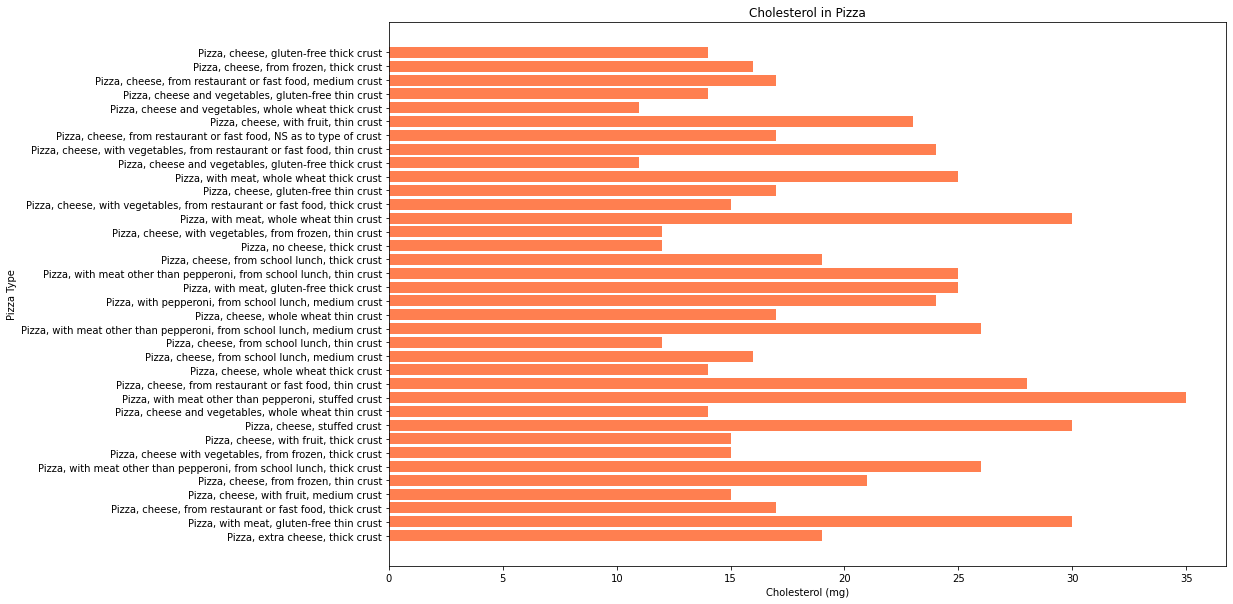

In [ ]:
# subsetting the pizza category and isolating the pizza type & cholesterol reading
pizza = df[df['Category'] == 'Pizza']
pizza = pizza.iloc[:,[1,7]]

# adjusting size to display nicely
plt.figure(figsize=[15,10])
plt.barh(pizza['Description'],pizza['Data.Cholesterol'], color = 'coral')

# titles and labels
plt.title('Cholesterol in Pizza')
plt.xlabel('Cholesterol (mg)')
plt.ylabel('Pizza Type')
plt.show()

## Item 4: A counter to Cholesterol, Niacin!


In our research we found that Niacin can aid the conversion of fat to energy which limits the levels of cholesterol the body needs to process. Niacin can treat high cholesterol and triglyceride levels. It can also reduce the risk of heart attack and slow narrowing of the arteries. With that said, we thought a list of foods containing the proper daily intake levels on Niacin would be useful.

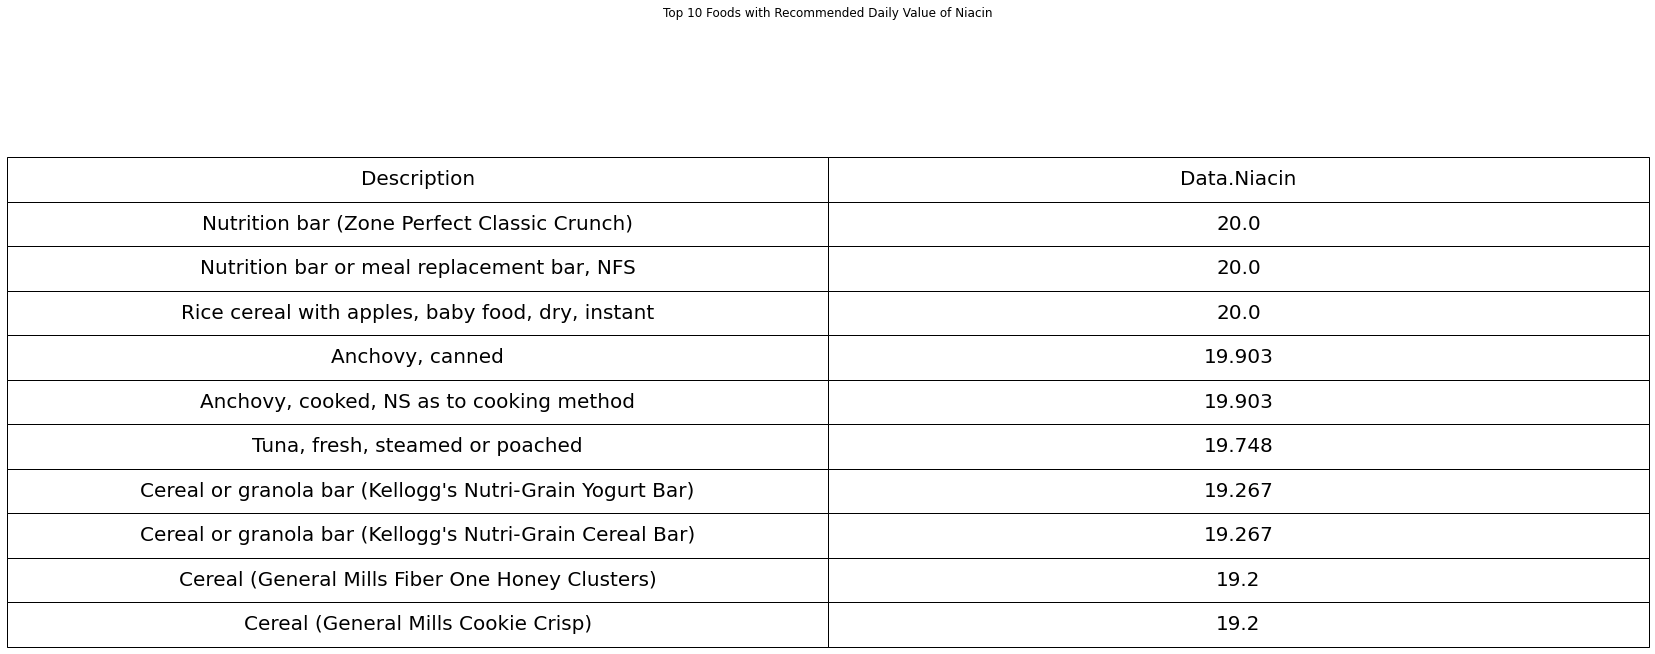

In [ ]:
tmp = df[(df['Data.Niacin'] >= 10) & (df['Data.Niacin'] <= 20)]
tmp=tmp.iloc[:,[1,12]]
tmp = tmp.nlargest(10,['Data.Niacin'])
# making the df into a table
table = plt.table(cellText=tmp.values, colLabels=tmp.columns, loc='bottom', cellLoc = 'center')

# formatting the display
plt.axis('off')
plt.axis('tight')
plt.tight_layout()
plt.title('Top 10 Foods with Recommended Daily Value of Niacin')
table.set_fontsize(20)
table.scale(4, 6) 
plt.show()

## Item 5: Foods rich in fiber, protein provides a balanced diet

Fiber and protein are mandatory in a healthy lifestyle.We also need vitamins, minerals and micro nutrients in our daily consumption of food. By comparing the foods with highest amount of fiber and protein, we can infer that beneficial nutrients are available in both the foods. If we consume both of these foods, we will get most of the nutrients needed to become fit and healthy.

A balanced diet is always the best choice. So, a healthy high-protein and high-fiber diet is beneficial and helps in heart disease prevention, fat loss, regulate digestive system

In [ ]:
# Food rich in fiber
high_fiber = df.nlargest(1, ['Data.Fiber'])
print(high_fiber['Description'])
# Food rich in protein
high_protein = df.nlargest(1, ['Data.Protein'])
print(high_protein['Description'])

best = df.loc[[7025, 4214]]

# Setting the index
best.set_index("Category", inplace = True)
best.drop(['Description', 'Nutrient Data Bank Number'], axis=1, inplace = True)

# We are dividing some variables to have a clear bar plot within a specific scale, 
# as the below 3 variables have very high values compared to others
best['Data.Major Minerals.Sodium'] = best['Data.Major Minerals.Sodium']/15
best['Data.Major Minerals.Potassium'] = best['Data.Major Minerals.Potassium']/3
best['Data.Major Minerals.Phosphorus'] = best['Data.Major Minerals.Phosphorus']/4

# Transposing the dataset
best = best.T

4214    Cereal (General Mills Fiber One)
Name: Description, dtype: object
7025    Nutritional powder mix, protein, NFS
Name: Description, dtype: object


In [ ]:
# Reset the index and rename the column
best.reset_index(drop=False, inplace = True)
best=best.rename(columns={'index':'Description'})

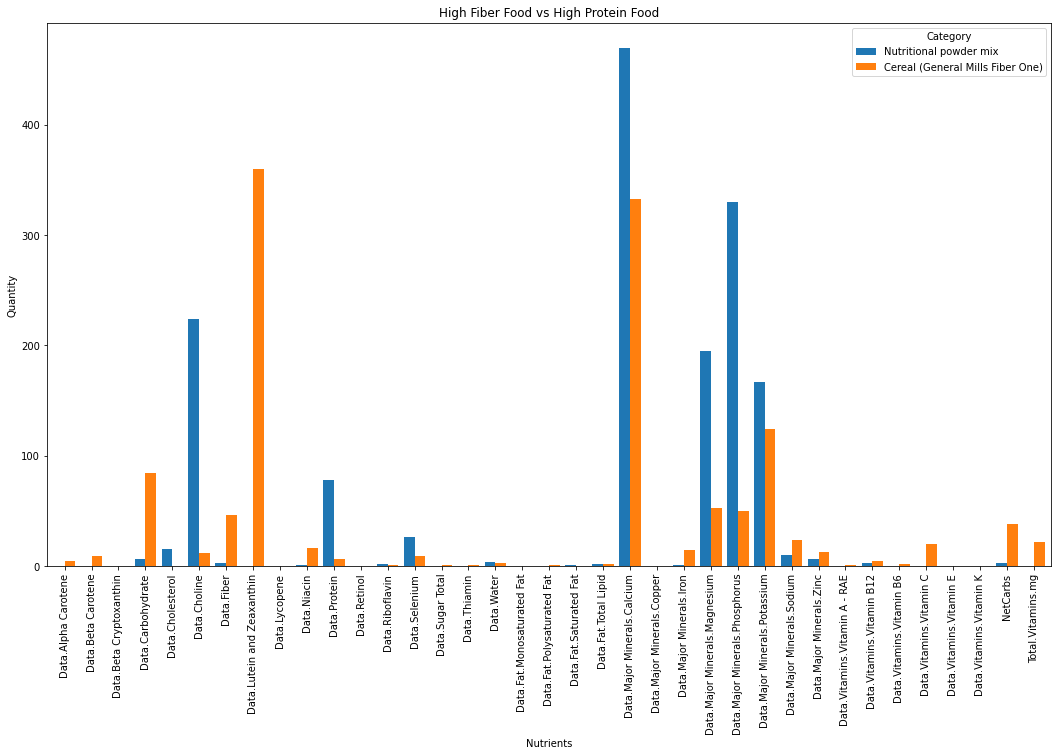

In [ ]:
# Plot the dataset
best.plot(kind='bar' , x='Description', title='High Fiber Food vs High Protein Food', width = 0.8, figsize= (18,10))
plt.xlabel('Nutrients')
plt.ylabel('Quantity')
plt.show()

# Data Splitting (2 pts)
Use an 80/10/10 split for train, test and validation. Use your group number as a random_seed so that you always will get the same modeling results.

How to get the test partition? Do a 50/50 split on the val partition and overwrite! 

Optional: You will likely want to make a copy of the metadata columns for each partition... you can call this X_train_meta, X_test_meta... just keep the first few columns of X_train and X_test.

In [ ]:
Y = df['Data.Cholesterol']
X = df.drop(['Data.Cholesterol','Category', 'Description'], axis=1)
print(X.shape)
print(Y.shape)

# Data split
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, Y, train_size=0.8, shuffle=True,
                                                    random_state = 21)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_remaining,Y_remaining, test_size=0.5,shuffle=True,
                                                    random_state = 21)

print(X_train.shape, X_test.shape,X_valid.shape, Y_train.shape, Y_test.shape, Y_valid.shape)

(6375, 37)
(6375,)
(5100, 37) (638, 37) (637, 37) (5100,) (638,) (637,)


## Metadata columns

In [ ]:
# creating meta data columns 
p = pd.DataFrame(X_train) 
p = p.loc[:,'Nutrient Data Bank Number']
X_train_meta = pd.concat([p, df], axis=1, join="inner")
X_train_meta = X_train_meta.loc[:, ['Category', 'Description', 'Data.Cholesterol']]
print(X_train_meta.head())

q = pd.DataFrame(X_test) 
q = q.loc[:,'Nutrient Data Bank Number']
X_test_meta = pd.concat([q, df], axis=1, join="inner")
X_test_meta = X_test_meta.loc[:, ['Category', 'Description', 'Data.Cholesterol']]
print(X_test_meta.head())

r = pd.DataFrame(X_valid) 
r = r.loc[:,'Nutrient Data Bank Number']
X_valid_meta = pd.concat([r, df], axis=1, join="inner")
X_valid_meta = X_valid_meta.loc[:, ['Category', 'Description', 'Data.Cholesterol']]
print(X_valid_meta.head())

                                   Category  \
1864              Chicken or turkey souffle   
3128                                   Naan   
5189                                Berries   
4587                           Spanakopitta   
6583  M&M's Peanut Butter Chocolate Candies   

                                Description  Data.Cholesterol  
1864              Chicken or turkey souffle               146  
3128                 Naan, Indian flatbread                 1  
5189                           Berries, NFS                 0  
4587                           Spanakopitta                77  
6583  M&M's Peanut Butter Chocolate Candies                 7  
                  Category                               Description  \
5132                 Fruit                                Fruit, NFS   
1530                  Tuna  Tuna, canned, NS as to oil or water pack   
2053   Paella with seafood                       Paella with seafood   
4252  Cereal (Quaker Life)                   

In [ ]:
# converting the partitions into numpy arrays
X_train_1 = np.array(X_train)
X_test_1 = np.array(X_test)
X_valid_1 = np.array(X_valid)
Y_train_1 = np.array(Y_train)
Y_test_1 = np.array(Y_test)
Y_valid_1 = np.array(Y_valid)

# Modeling (Regression) (10 pts)
Use subheaders to keep your notebook really organized!

Can you predict Cholesterol from the other nutrition variables?

1. Model1: Fit a very basic linear regression model (vanilla)
2. Model2: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. Polynomial features, interaction terms... other?
3. Model3: Same as (1), but drop any records where cholesterol is equal to 0. 
4. Model4: Same as (2), but drop any records where cholesterol is equal to 0.

## Model 1

### Min/Max scaling

In [ ]:
# Min/Max Scaling the X data
scaler = MinMaxScaler()

X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
X_valid_1 = scaler.transform(X_valid_1)

### Fit the Model

In [ ]:
# fitting a simple linear regression model
LR = LinearRegression()
LR = LR.fit(X_train_1, Y_train_1)

train_preds_1 = LR.predict(X_train_1)
test_preds_1 = LR.predict(X_test_1) 
valid_preds_1 = LR.predict(X_valid_1) 

## Model 2

### Polynomial and Interaction terms

In [ ]:
poly = PolynomialFeatures(2) 
X_2 = poly.fit_transform(X)
X_2 = pd.DataFrame(X_2)
print(X_2.shape)
del X_2[0]  # Delete the first column
print(X_2.shape)
X_2.head()

(6375, 741)
(6375, 740)


,1,2,3,4,5,6,7,8,9,10,...,731,732,733,734,735,736,737,738,739,740
0,26147140.0,0.0,0.0,1.0,9.85,73.2,0.6,48.0,0.0,7.901,...,2.4336,17.784,14.4300,3.001768,129.96,105.450,21.935994,85.5625,17.798942,3.702584
1,23101020.0,0.0,0.0,0.0,0.00,107.4,0.0,0.0,0.0,6.793,...,0.0256,0.624,0.0000,0.052064,15.21,0.000,1.269060,0.0000,0.000000,0.105885
2,23322300.0,0.0,0.0,0.0,0.00,105.0,0.0,0.0,0.0,9.994,...,0.9025,4.085,0.0000,1.575100,18.49,0.000,7.129400,0.0000,0.000000,2.748964
3,53430700.0,0.0,2.0,2.0,35.61,2.3,2.3,4.0,0.0,1.354,...,0.5929,5.005,25.6487,0.684145,42.25,216.515,5.775250,1109.5561,29.595935,0.789432
4,57221810.0,25.0,38.0,0.0,84.19,17.5,5.9,687.0,0.0,18.500,...,0.6241,0.711,61.8491,46.436587,0.81,70.461,52.902441,6129.3241,4601.924562,3455.146005


### Data Splitting

In [ ]:
Y = df['Data.Cholesterol']
print(X_2.shape)
print(Y.shape)

# Data split
X_train_2, X_remaining_2, Y_train_2, Y_remaining_2 = train_test_split(X_2, Y, train_size=0.8,shuffle=True,
                                                    random_state = 21)

X_valid_2, X_test_2, Y_valid_2, Y_test_2 = train_test_split(X_remaining_2, Y_remaining_2, test_size=0.5,shuffle=True,
                                                    random_state = 21)

print(X_train_2.shape, X_test_2.shape, X_valid_2.shape, Y_train_2.shape, Y_test_2.shape, Y_valid_2.shape)

(6375, 740)
(6375,)
(5100, 740) (638, 740) (637, 740) (5100,) (638,) (637,)


### Min/Max Scaling

In [ ]:
# converting the partitions into numpy arrays
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
X_valid_2 = np.array(X_valid_2)

Y_train_2 = np.array(Y_train_2)
Y_test_2 = np.array(Y_test_2)
Y_valid_2 = np.array(Y_valid_2)

In [ ]:
scaler = MinMaxScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
X_valid_2 = scaler.transform(X_valid_2)

### PCA

In [ ]:
pca = PCA(n_components = 0.95) 
X_train_2 = pca.fit_transform(X_train_2)
X_train_2 = pd.DataFrame(X_train_2)
print(X_train_2.shape)
X_train_2.head()
X_test_2 = pca.transform(X_test_2)
X_test_2 = pd.DataFrame(X_test_2)
print(X_test_2.shape)
X_test_2.head()
X_valid_2 = pca.transform(X_valid_2)
X_valid_2 = pd.DataFrame(X_valid_2)
print(X_valid_2.shape)
X_valid_2.head()

(5100, 70)
(638, 70)
(637, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.688148,-0.593769,0.455032,0.039649,-0.045440,0.070801,-0.086405,0.123178,-0.005800,0.062330,...,-0.005813,-0.026314,-0.020928,0.018658,0.035052,0.021430,0.035313,0.000596,-0.007399,-0.015923
1,0.294237,0.218441,0.709079,-0.785996,-0.197653,-0.121836,0.473463,-0.317804,0.600376,-0.732068,...,0.072953,-0.135642,0.058968,-0.043746,-0.011837,0.031757,-0.175383,-0.028630,-0.184968,-0.066668
2,-0.186915,-0.471591,-0.367916,0.017322,0.337598,-0.198296,-0.106117,-0.079098,-0.129545,-0.113893,...,-0.034312,-0.005471,0.000412,0.007031,0.002103,-0.011900,-0.004618,0.017389,0.018291,0.000879
3,-0.306393,-0.186916,0.019218,0.050896,0.408853,0.079738,0.410359,0.613290,0.073089,0.087389,...,0.016687,-0.020045,0.011224,0.025420,0.014937,0.034928,0.035469,0.054549,-0.004021,-0.025498
4,-0.158489,0.414998,-0.227850,-0.035150,0.024435,0.004534,0.020146,-0.095743,0.073485,-0.049052,...,0.005807,0.017653,0.004824,-0.008811,0.007909,-0.001013,-0.002184,-0.009932,-0.016942,-0.022899


### Fit Model

In [ ]:
# We will use Linear Regression
LR = LinearRegression()
LR = LR.fit(X_train_2, Y_train_2)

In [ ]:
train_preds_2 = LR.predict(X_train_2) 
test_preds_2 = LR.predict(X_test_2)
valid_preds_2 = LR.predict(X_valid_2)

print(train_preds_2.shape)
print(test_preds_2.shape)
print(valid_preds_2.shape)

(5100,)
(638,)
(637,)


## Model 3

### Data splitting

In [ ]:
tmp = df[df['Data.Cholesterol'] != 0]
print(tmp.shape)
Y_3 = tmp['Data.Cholesterol']
X_3 = tmp.drop(['Data.Cholesterol','Category', 'Description'], axis=1)
print(X_3.shape)
print(Y_3.shape)

# Data split
X_train_3, X_remaining_3, Y_train_3, Y_remaining_3 = train_test_split(X_3, Y_3, train_size=0.8,shuffle=True,
                                                    random_state = 21)

X_valid_3, X_test_3, Y_valid_3, Y_test_3 = train_test_split(X_remaining_3,Y_remaining_3, test_size=0.5,shuffle=True,
                                                    random_state = 21)

print(X_train_3.shape, X_test_3.shape,X_valid_3.shape, Y_train_3.shape, Y_test_3.shape, Y_valid_3.shape)



(4161, 40)
(4161, 37)
(4161,)
(3328, 37) (417, 37) (416, 37) (3328,) (417,) (416,)


In [ ]:
# converting the partitions into numpy arrays
X_train_3 = np.array(X_train_3)
X_test_3 = np.array(X_test_3)
X_valid_3 = np.array(X_valid_3)
Y_train_3 = np.array(Y_train_3)
Y_test_3 = np.array(Y_test_3)
Y_valid_3 = np.array(Y_valid_3)

### Min/Max scaling

In [ ]:
# Min/Max Scaling the X data
scaler = MinMaxScaler()

X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)
X_valid_3 = scaler.transform(X_valid_3)

### Fit the Model

In [ ]:
# fitting simple linear regression with 0 Cholesterol removed
LR = LinearRegression()
LR = LR.fit(X_train_3, Y_train_3)

train_preds_3 = LR.predict(X_train_3)
test_preds_3 = LR.predict(X_test_3) 
valid_preds_3 = LR.predict(X_valid_3) 


## Model 4

### Polynomial and Interaction terms

In [ ]:
tmp = df[df['Data.Cholesterol'] != 0]
print(tmp.shape)
Y_4 = tmp['Data.Cholesterol']
X_4 = tmp.drop(['Data.Cholesterol','Category', 'Description'], axis=1)
print(X_4.shape)
print(Y_4.shape)
poly = PolynomialFeatures(2) 
X_4 = poly.fit_transform(X_4)
X_4 = pd.DataFrame(X_4)
print(X_4.shape)
del X_4[0] # Delete the first column
print(X_4.shape)
X_4.head()

(4161, 40)
(4161, 37)
(4161,)
(4161, 741)
(4161, 740)


,1,2,3,4,5,6,7,8,9,10,...,731,732,733,734,735,736,737,738,739,740
0,26147140.0,0.0,0.0,1.0,9.85,73.2,0.6,48.0,0.0,7.901,...,2.4336,17.784,14.4300,3.001768,129.96,105.450,21.935994,85.5625,17.798942,3.702584
1,23101020.0,0.0,0.0,0.0,0.00,107.4,0.0,0.0,0.0,6.793,...,0.0256,0.624,0.0000,0.052064,15.21,0.000,1.269060,0.0000,0.000000,0.105885
2,23322300.0,0.0,0.0,0.0,0.00,105.0,0.0,0.0,0.0,9.994,...,0.9025,4.085,0.0000,1.575100,18.49,0.000,7.129400,0.0000,0.000000,2.748964
3,75418040.0,0.0,94.0,0.0,9.28,9.5,1.2,998.0,0.0,0.897,...,0.0289,0.680,1.3736,2.418945,16.00,32.320,56.916360,65.2864,114.971047,202.467002
4,27345510.0,326.0,836.0,1.0,14.84,14.4,1.1,161.0,3641.0,1.976,...,1.3456,17.168,15.9384,7.977146,219.04,203.352,101.777380,188.7876,94.487919,47.291066


### Data Splitting

In [ ]:
# Data split
X_train_4, X_remaining_4, Y_train_4, Y_remaining_4 = train_test_split(X_4, Y_4, train_size=0.8,shuffle=True,
                                                    random_state = 21)

X_valid_4, X_test_4, Y_valid_4, Y_test_4 = train_test_split(X_remaining_4, Y_remaining_4, test_size=0.5,shuffle=True,
                                                    random_state = 21)

print(X_train_4.shape, X_test_4.shape, X_valid_4.shape, Y_train_4.shape, Y_test_4.shape, Y_valid_4.shape)

(3328, 740) (417, 740) (416, 740) (3328,) (417,) (416,)


### Min/Max Scaling

In [ ]:
# converting the partitions into numpy arrays
X_train_4 = np.array(X_train_4)
X_test_4 = np.array(X_test_4)
X_valid_4 = np.array(X_valid_4)

Y_train_4 = np.array(Y_train_4)
Y_test_4 = np.array(Y_test_4)
Y_valid_4 = np.array(Y_valid_4)

In [ ]:
# Min/Max Scaling the X data
scaler = MinMaxScaler()
X_train_4 = scaler.fit_transform(X_train_4)
X_test_4 = scaler.transform(X_test_4)
X_valid_4 = scaler.transform(X_valid_4)

### PCA

In [ ]:
pca = PCA(n_components = 0.95) 
X_train_4 = pca.fit_transform(X_train_4)
X_train_4 = pd.DataFrame(X_train_4)
print(X_train_4.shape)
X_train_4.head()
X_test_4 = pca.transform(X_test_4)
X_test_4 = pd.DataFrame(X_test_4)
print(X_test_4.shape)
X_test_4.head()
X_valid_4 = pca.transform(X_valid_4)
X_valid_4 = pd.DataFrame(X_valid_4)
print(X_valid_4.shape)
X_valid_4.head()

(3328, 65)
(417, 65)
(416, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.021502,0.039981,-0.146075,0.034031,0.169292,0.280761,0.082438,-0.053950,0.113100,0.076085,...,0.020132,-0.018173,-0.074917,0.080350,-0.007762,-0.040825,-0.000645,-0.034314,0.013123,-0.050607
1,-0.114175,0.587952,-0.126952,0.060987,-0.038661,0.122543,-0.034832,-0.015223,-0.171043,-0.112129,...,-0.015829,-0.022100,-0.035243,0.014627,0.025960,0.020121,0.006201,0.010478,-0.012805,-0.014355
2,0.006238,1.283913,0.012873,-0.422727,0.280772,0.382691,0.302434,-0.010011,0.581744,1.458971,...,-0.111731,0.000268,0.133028,0.001600,-0.006467,-0.021076,0.042271,0.052716,-0.000139,0.061098
3,-0.100709,-0.694694,-0.262924,0.178862,-0.124361,0.010325,0.288792,-0.032974,-0.137239,0.013200,...,0.021855,0.005809,0.021437,0.041480,-0.009697,-0.028870,0.003430,0.012215,-0.010989,-0.008161
4,-0.518557,-0.236976,-0.169480,-0.016915,-0.220842,-0.061292,-0.073686,0.055397,0.189004,-0.053077,...,-0.018906,0.011336,-0.012340,0.022918,-0.014181,0.007559,-0.032734,0.008823,-0.008669,0.003700


### Fit Model

In [ ]:
# fitting simple linear regression with 0 Cholesterol removed
LR = LinearRegression()
LR = LR.fit(X_train_4, Y_train_4)

In [ ]:
train_preds_4 = LR.predict(X_train_4) 
test_preds_4 = LR.predict(X_test_4)
valid_preds_4 = LR.predict(X_valid_4)

print(train_preds_4.shape)
print(test_preds_4.shape)
print(valid_preds_4.shape)

(3328,)
(417,)
(416,)


# Analyze and interpret regression errors (20 points)
Use subheaders to keep your notebook really organized!

**Novice...** (10 pts)
* Make scatterplots (x=actual and y= predicted) and calculate at least three error metrics for each partition (train, val, test). A three-panel scatterplot would be nice here.

**Advanced...** (10 pts, 5 pts each)

These are advanced because you need to join those three metadata columns and your predictions together. This is why the shape of a dataset is so important to keep track of! You may need to go back and store these metadata as another dataframe, and then concatenate the two dataframes (be careful of shuffling rows.) Ask on the discussion board or during office hours if you are stuck.

* Which food categories or items does the model have the most trouble predicting? Does your model tend to overestimate or underestimate?
* Which food categories or item does your model make a negative prediction for? 

* Write a few bullets below each item describing what's going on. Don't just make tables/plots and assume someone will understand - show the value of what you did! 

## Scatter plot

### Model 1

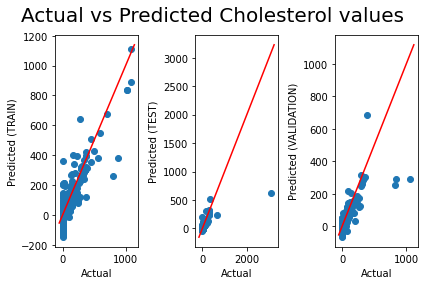

In [ ]:

fig, axes = plt.subplots(1,3) # 1 row, 3 columns
fig.suptitle("Actual vs Predicted Cholesterol values", fontsize=20)

axes[0].scatter(x=Y_train_1, y=train_preds_1)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=Y_test_1, y=test_preds_1)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=Y_valid_1, y=valid_preds_1)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (VALIDATION)",  fontsize=10)
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Model 2

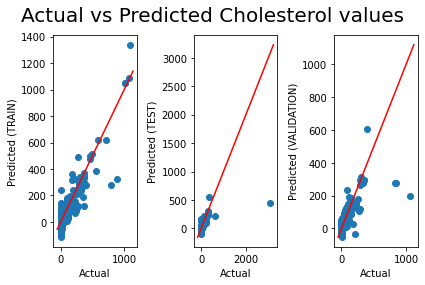

In [ ]:
fig, axes = plt.subplots(1,3) # 1 row, 3 columns
fig.suptitle("Actual vs Predicted Cholesterol values", fontsize=20)

axes[0].scatter(x=Y_train_2, y=train_preds_2)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=Y_test_2, y=test_preds_2)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=Y_valid_2, y=valid_preds_2)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (VALIDATION)",  fontsize=10)
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Model 3

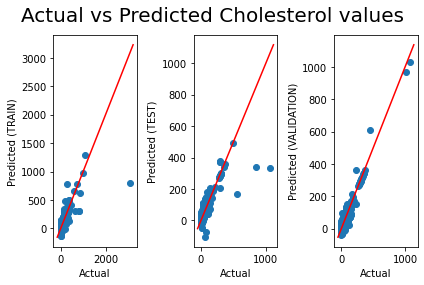

In [ ]:

fig, axes = plt.subplots(1,3) # 1 row, 3 columns
fig.suptitle("Actual vs Predicted Cholesterol values", fontsize=20)

axes[0].scatter(x=Y_train_3, y=train_preds_3)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=Y_test_3, y=test_preds_3)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=Y_valid_3, y=valid_preds_3)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (VALIDATION)",  fontsize=10)
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Model 4

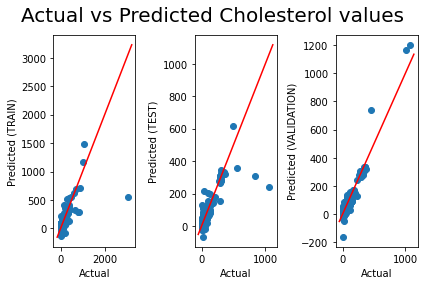

In [ ]:
fig, axes = plt.subplots(1,3) # 1 row, 3 columns
fig.suptitle("Actual vs Predicted Cholesterol values", fontsize=20)

axes[0].scatter(x=Y_train_4, y=train_preds_4)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=Y_test_4, y=test_preds_4)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

axes[2].scatter(x=Y_valid_4, y=valid_preds_4)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (VALIDATION)",  fontsize=10)
x = np.linspace(*axes[2].get_xlim())
axes[2].plot(x, x, color='red')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## Error Metrics

### Model 1

In [ ]:
print("This is train R2:", r2_score(Y_train_1, train_preds_1)) # train
print("This is test R2:", r2_score(Y_test_1, test_preds_1)) # test
print("This is validation R2:", r2_score(Y_valid_1, valid_preds_1)) # validation

trainMAE = mean_absolute_error(Y_train_1, train_preds_1)
print("This is train MAE:", trainMAE) # train
testMAE = mean_absolute_error(Y_test_1, test_preds_1)
print("This is test MAE:", testMAE) # test
validMAE = mean_absolute_error(Y_valid_1, valid_preds_1)
print("This is validation MAE:", validMAE) # validation

trainMSE = mean_squared_error(Y_train_1, train_preds_1)
print("This is train MSE:", trainMSE) # train
testMSE = mean_squared_error(Y_test_1, test_preds_1)
print("This is test MSE:", testMSE) # test
validMSE = mean_squared_error(Y_valid_1, valid_preds_1)
print("This is validation MSE:", validMSE) # validation

This is train R2: 0.8314033159128517
This is test R2: 0.4305967546843539
This is validation R2: 0.6113738439281075
This is train MAE: 14.302027647582127
This is test MAE: 17.66189980043787
This is validation MAE: 17.0443154586619
This is train MSE: 711.8617005167026
This is test MSE: 10120.049224892717
This is validation MSE: 2590.267585705675


### Model 2

In [ ]:
print("This is train R2:", r2_score(Y_train_2, train_preds_2)) # train
print("This is test R2:", r2_score(Y_test_2, test_preds_2)) # test
print("This is validation R2:", r2_score(Y_valid_2, valid_preds_2)) # validation

trainMAE = mean_absolute_error(Y_train_2, train_preds_2)
print("This is train MAE:", trainMAE) # train
testMAE = mean_absolute_error(Y_test_2, test_preds_2)
print("This is test MAE:", testMAE) # test
validMAE = mean_absolute_error(Y_valid_2, valid_preds_2)
print("This is validation MAE:", validMAE) # validation

trainMSE = mean_squared_error(Y_train_2, train_preds_2)
print("This is train MSE:", trainMSE) # train
testMSE = mean_squared_error(Y_test_2, test_preds_2)
print("This is test MSE:", testMSE) # test
validMSE = mean_squared_error(Y_valid_2, valid_preds_2)
print("This is validation MSE:", validMSE) # validation

This is train R2: 0.8669242393564454
This is test R2: 0.3425981597143135
This is validation R2: 0.5763708871292971
This is train MAE: 12.940536670588495
This is test MAE: 17.898566327045792
This is validation MAE: 17.06387340071168
This is train MSE: 561.8825647858372
This is test MSE: 11684.055261290585
This is validation MSE: 2823.5689808465672


### Model 3

In [ ]:
print("This is train R2:", r2_score(Y_train_3, train_preds_3)) # train
print("This is test R2:", r2_score(Y_test_3, test_preds_3)) # test
print("This is validation R2:", r2_score(Y_valid_3, valid_preds_3)) # validation

trainMAE = mean_absolute_error(Y_train_3, train_preds_3)
print("This is train MAE:", trainMAE) # train
testMAE = mean_absolute_error(Y_test_3, test_preds_3)
print("This is test MAE:", testMAE) # test
validMAE = mean_absolute_error(Y_valid_3, valid_preds_3)
print("This is validation MAE:", validMAE) # validation

trainMSE = mean_squared_error(Y_train_3, train_preds_3)
print("This is train MSE:", trainMSE) # train
testMSE = mean_squared_error(Y_test_3, test_preds_3)
print("This is test MSE:", testMSE) # test
validMSE = mean_squared_error(Y_valid_3, valid_preds_3)
print("This is validation MSE:", validMSE) # validation

This is train R2: 0.6648519752944315
This is test R2: 0.6792871042992135
This is validation R2: 0.9385097780672021
This is train MAE: 17.665993990027392
This is test MAE: 18.940294358862776
This is validation MAE: 16.79759104262719
This is train MSE: 2533.951823897284
This is test MSE: 2849.187009585238
This is validation MSE: 630.4507430296724


### Model 4

In [ ]:
print("This is train R2:", r2_score(Y_train_4, train_preds_4)) # train
print("This is test R2:", r2_score(Y_test_4, test_preds_4)) # test
print("This is validation R2:", r2_score(Y_valid_4, valid_preds_4)) # validation

trainMAE = mean_absolute_error(Y_train_4, train_preds_4)
print("This is train MAE:", trainMAE) # train
testMAE = mean_absolute_error(Y_test_4, test_preds_4)
print("This is test MAE:", testMAE) # test
validMAE = mean_absolute_error(Y_valid_4, valid_preds_4)
print("This is validation MAE:", validMAE) # validation

trainMSE = mean_squared_error(Y_train_4, train_preds_4)
print("This is train MSE:", trainMSE) # train
testMSE = mean_squared_error(Y_test_4, test_preds_4)
print("This is test MSE:", testMSE) # test
validMSE = mean_squared_error(Y_valid_4, valid_preds_4)
print("This is validation MSE:", validMSE) #validation

This is train R2: 0.6365115195585155
This is test R2: 0.6600883525031944
This is validation R2: 0.9251021993421554
This is train MAE: 16.694778546596794
This is test MAE: 19.58423112048186
This is validation MAE: 16.342465576634197
This is train MSE: 2748.225351438417
This is test MSE: 3019.747142809512
This is validation MSE: 767.9167937892968


## Advanced

**`Which food categories or items does the model have the most trouble predicting?`**

By taking into consideration of the whole dataset, the Rsquare and MAE values are better for model 1 than model 2. So, the model 1 predictions and residuals are added to the metadata columns.

 Adding prediction values to the metadata columns


In [ ]:
# Train predictions
X_train_meta['pred']=train_preds_1
X_train_meta.head()

# Test predictions
X_test_meta['pred']=test_preds_1
X_test_meta.head()

# Valid predictions
X_valid_meta['pred']=valid_preds_1
X_valid_meta.head()

,Category,Description,Data.Cholesterol,pred
5821,Raw vegetable,"Raw vegetable, NFS",0,0.086947
6353,Canola oil,Canola oil,0,-18.997705
4024,Barley,"Barley, no added fat",0,9.985184
4652,Manicotti,"Manicotti, vegetable- and cheese-filled, with ...",47,38.145624
2313,Roast beef sandwich,"Roast beef sandwich, with gravy",32,46.120294


Adding residuals to the metadata columns:
We are subtracting the predicted value from the actual cholesterol value to obtain the residuals for train, test, and validation data

In [ ]:
# Train
X_train_meta['residuals'] = X_train_meta['pred'] - X_train_meta['Data.Cholesterol']
X_train_meta.head()

# Test
X_test_meta['residuals'] = X_test_meta['pred'] - X_test_meta['Data.Cholesterol']
X_test_meta.head()

# Valid
X_valid_meta['residuals'] = X_valid_meta['pred'] - X_valid_meta['Data.Cholesterol']
X_valid_meta.head()

,Category,Description,Data.Cholesterol,pred,residuals
5821,Raw vegetable,"Raw vegetable, NFS",0,0.086947,0.086947
6353,Canola oil,Canola oil,0,-18.997705,-18.997705
4024,Barley,"Barley, no added fat",0,9.985184,9.985184
4652,Manicotti,"Manicotti, vegetable- and cheese-filled, with ...",47,38.145624,-8.854376
2313,Roast beef sandwich,"Roast beef sandwich, with gravy",32,46.120294,14.120294


Outliers are considered as the most trouble predicting values.
They are identified by finding the values outside the inter quartile range of the residuals. 

In [ ]:
Q1 = X_test_meta['residuals'].quantile(0.25)
Q3 = X_test_meta['residuals'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = X_test_meta[(X_test_meta['residuals'] < (Q1 - 1.5 * IQR)) | (X_test_meta['residuals'] > (Q3 + 1.5 * IQR))]
print(outliers['Category'].unique())

Q1 = X_valid_meta['residuals'].quantile(0.25)
Q3 = X_valid_meta['residuals'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = X_valid_meta[(X_valid_meta['residuals'] < (Q1 - 1.5 * IQR)) | (X_valid_meta['residuals'] > (Q3 + 1.5 * IQR))]
print(outliers['Category'].unique())


16.22958731353847
['Doughnut' 'Liver dumpling' 'Croissant sandwich with bacon and egg'
 'Potato chips' 'Beef jerky' 'Egg omelet or scrambled egg' 'Coconut milk'
 'Chicken thigh' 'Cauliflower' 'Cornish game hen' 'Rice with squid'
 'Brains' 'Fish moochim'
 'Cereal or granola bar (General Mills Nature Valley Sweet and Salty Granola Bar)'
 'Shrimp' 'Salmon' 'Coconut oil' 'Coconut' 'Perch' 'Beef' 'Goat ribs'
 'Egg and bacon on biscuit'
 "Cereal (Kellogg's All-Bran Complete Wheat Flakes)"
 'Frankfurter or hot dog sandwich' 'Flounder' 'Dove' 'Scallops' 'Chicken'
 'Broccoflower' 'Chicken or turkey fricassee' 'Cream puff' 'Lobster' 'Pie'
 'Squid' 'Vada' 'Shrimp scampi' 'Muffin' 'Butter'
 'Cornmeal dressing with chicken or turkey and vegetables' 'Chicken leg'
 'Pork']
15.443956271688869
['Egg omelet or scrambled egg' 'Honey butter' 'Chicken wing' 'Coffee'
 'Ice cream candy bar' 'Potato chips' 'Chicken thigh' 'Beef liver'
 'Cornbread muffin' 'Halvah' 'Frankfurter or hot dog sandwich' 'Bear'
 'Dir

These are the categories that the model have most trouble predicting in the test and validation data are:

Egg omlet, Cauliflower, Squid, Butter, Ham, scallops etc.

**`Does your model tend to overestimate or underestimate?`**

From the scatter plot of the model 1 actual vs predicted values, there are more values below the 45degrees line in test and validation data.
The mean bias error is negative for model 1 which indicates that the model is underestimating the cholesterol values in the given dataset.

In [ ]:
d3 = X_train_meta['pred'] - X_train_meta['Data.Cholesterol']
mbe_train = d3.mean()
print(mbe_train) # Bias of the train data
d1 = X_test_meta['pred'] - X_test_meta['Data.Cholesterol']
mbe_test = d1.mean()
print(mbe_test) # test data
d2 = X_valid_meta['pred'] - X_valid_meta['Data.Cholesterol']
mbe_valid = d2.mean()
print(mbe_valid) # validation data

-7.728197167178972e-15
-4.254876560353325
-4.483039940519374


**Which food categories or item does your model make a negative prediction for?**

Some of the categories that the model make negative prediction in test and validation data are:

Cereals, Rice, Soft drink, fruits, juices, etc

In [ ]:
# Test
temp = X_test_meta[X_test_meta['pred'] < 0 ]
temp = temp.sort_values(by="pred")
p = pd.DataFrame(temp.loc[:,'Category'])
print(p.shape)
p['Category'].unique()

(137, 1)


array(["Cereal (Kellogg's All-Bran Complete Wheat Flakes)",
       'Cereal (Post Raisin Bran)', 'Cereal (General Mills Fiber One)',
       'Chives', 'Chard', 'Meringues', 'Nutritional drink or shake',
       'Hard candy', 'Cereal or Granola bar', 'Kale',
       'Cereal (General Mills Wheaties)', 'Coffee', 'Green banana',
       'Passion fruit', 'Beets', 'Skittles', 'Coffee creamer', 'Nougat',
       'Corn flour patty or tart', 'Roll', 'Bread', 'Prunes',
       'Sun-dried tomatoes', 'Fudge',
       "Cereal or granola bar (Kellogg's Nutri-Grain Fruit and Nut Bar)",
       'Bananas and strawberry', 'Cookie',
       'Cereal (Malt-O-Meal Marshmallow Mateys)', 'Blueberries',
       'Fruit flavored snack', 'Bacardi cocktail', 'Apricot nectar',
       'Margarita', 'Bacon strip', 'Banana nectar', 'Pears', 'Scotch',
       'Popsicle', 'Singapore Sling', 'Soybean oil',
       'Cranberry juice blend', 'Fruit punch',
       'Cereal (Kashi 7 Whole Grain Puffs)', 'Fruit juice drink', 'Pie',
       'W

In [ ]:
# Validation
temp = X_valid_meta[X_valid_meta['pred'] < 0 ]
temp = temp.sort_values(by="pred")
p = pd.DataFrame(temp.loc[:,'Category'])
print(p.shape)
p['Category'].unique()

(133, 1)


array(['Coffee', 'Palm hearts', 'Tamarind', 'Potato chips', 'Raisins',
       'Halvah', 'Swiss steak', 'Sugar', 'Beef', 'Fondant',
       'Cereal (General Mills Cheerios Honey Nut)', 'Date candy',
       'Mustard greens', 'Dietetic or low calorie gumdrops', 'Canola oil',
       'Cereal or granola bar (General Mills Nature Valley Crunchy Granola Bar)',
       'Chocolate syrup', 'Popcorn', 'Cereal (Quaker Granola with Oats',
       'Bread', 'Okra', 'Corn nuts', 'Soyburger', 'Bagel', 'Cookie',
       'Cereal (Post Shredded Wheat Honey Nut)', 'Wax candy',
       'Walnut oil', 'Oatmeal with applesauce and bananas', 'Crackers',
       'Duck sauce', 'Luffa', 'Potato', 'Horseradish',
       'Bananas with apples and pears', 'Fig',
       'Pomegranate juice beverage', 'Water', 'Plum', 'Cranberry sauce',
       'Tom Collins', 'Wine', 'Manhattan', 'Cereal', 'Tortilla chips',
       'Cereal (General Mills Fiber One Raisin Bran Clusters)',
       'Egg substitute', 'Popcorn chips', 'Cereal (Kashi GOL

# Modeling (Classification) (10 pts)
Use subheaders to keep your notebook really organized! 

I'd like you to also practice your classification modeling skills. Any regression problem can turn into a classification problem if you recode the target variable. 

Calculate the median cholesterol and build classification models to predict below or equal to (y=0) or greater than (y=1) the median cholesterol value from the other nutrition variables? Use the entire dataset (don't drop any rows where cholesterol == 0, these will be helpful!)

* Model4: Fit a very basic logistic regression model (vanilla)
* Model5: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. You can use the same features from Model 2 if you want to.

## Model 5

### Data splitting

In [ ]:
# data splitting
df['Is_Cholesterol'] = np.where(df['Data.Cholesterol'] > df['Data.Cholesterol'].median(),
                      1, 
                      0)
df.head()

Y_classification = df['Is_Cholesterol']
X_classification = df.drop(['Data.Cholesterol','Category', 'Description','Is_Cholesterol'], axis=1)
print(X_classification.shape)
print(Y_classification.shape)
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X_classification, Y_classification, train_size=0.8,shuffle=True,
                                                    random_state = 21)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_remaining,Y_remaining, test_size=0.5,shuffle=True,
                                                    random_state = 21)

print(X_train.shape, X_test.shape,X_valid.shape, Y_train.shape, Y_test.shape, Y_valid.shape)

X_train_5 = np.array(X_train)
X_test_5 = np.array(X_test)
X_valid_5 = np.array(X_valid)
Y_train_5 = np.array(Y_train)
Y_test_5 = np.array(Y_test)
Y_valid_5 = np.array(Y_valid)


(6375, 37)
(6375,)
(5100, 37) (638, 37) (637, 37) (5100,) (638,) (637,)


### Min/Max scaling

In [ ]:
# Min/Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_5)
X_test = scaler.transform(X_test_5)
X_valid = scaler.transform(X_valid_5)

In [ ]:
tmp = pd.DataFrame(X_train_5)
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,5.100000e+03,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,...,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,4.888141e+07,44.227255,266.670196,5.211373,20.925590,34.271588,1.726902,215.634706,259.707255,2.631233,...,333.608627,1.288725,71.118039,0.673600,0.199837,5.823137,1.123333,14.365098,19.198688,7.232464
std,2.425378e+07,262.725309,1034.281544,43.327765,21.882478,44.590004,2.589541,1015.592935,1037.850700,4.026514,...,328.654180,3.032458,189.120875,1.985678,0.391885,16.195482,3.410752,56.206991,20.769188,16.966601
min,1.100000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.721212e+07,0.000000,0.000000,0.000000,5.837500,10.000000,0.200000,0.000000,0.000000,0.520000,...,122.000000,0.360000,2.000000,0.000000,0.052000,0.000000,0.240000,0.800000,4.727500,0.851488
50%,5.330540e+07,0.000000,8.000000,0.000000,13.340000,19.300000,1.000000,18.000000,0.000000,1.469000,...,310.000000,0.680000,20.000000,0.180000,0.109000,0.700000,0.550000,3.900000,12.400000,2.200875
75%,6.720325e+07,1.000000,76.000000,1.000000,26.590000,43.700000,2.200000,82.000000,0.000000,3.329500,...,451.000000,1.342500,61.000000,0.540000,0.202000,5.600000,1.130000,9.400000,24.417500,6.954810
max,9.999821e+07,4655.000000,14134.000000,1922.000000,100.000000,820.200000,42.800000,15643.000000,13895.000000,127.500000,...,7851.000000,98.860000,4727.000000,50.670000,12.000000,560.000000,149.400000,1640.000000,100.000000,560.000000


### Fit the Model

In [ ]:
# fitting Logistic regression
LR = LogisticRegression() 
LR = LR.fit(X_train_5, Y_train_5)

In [ ]:
train_preds_5 = LR.predict(X_train_5) 
test_preds_5 = LR.predict(X_test_5)
valid_preds_5 = LR.predict(X_valid_5)

## Model 6

### Polynomial and interaction terms

In [ ]:
poly = PolynomialFeatures(2) 
X_poly = poly.fit_transform(X_classification)
X_poly = pd.DataFrame(X_poly)
print(X_poly.shape)
X_poly.head() 

(6375, 741)


,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
0,1.0,26147140.0,0.0,0.0,1.0,9.85,73.2,0.6,48.0,0.0,...,2.4336,17.784,14.4300,3.001768,129.96,105.450,21.935994,85.5625,17.798942,3.702584
1,1.0,23101020.0,0.0,0.0,0.0,0.00,107.4,0.0,0.0,0.0,...,0.0256,0.624,0.0000,0.052064,15.21,0.000,1.269060,0.0000,0.000000,0.105885
2,1.0,23322300.0,0.0,0.0,0.0,0.00,105.0,0.0,0.0,0.0,...,0.9025,4.085,0.0000,1.575100,18.49,0.000,7.129400,0.0000,0.000000,2.748964
3,1.0,53430700.0,0.0,2.0,2.0,35.61,2.3,2.3,4.0,0.0,...,0.5929,5.005,25.6487,0.684145,42.25,216.515,5.775250,1109.5561,29.595935,0.789432
4,1.0,57221810.0,25.0,38.0,0.0,84.19,17.5,5.9,687.0,0.0,...,0.6241,0.711,61.8491,46.436587,0.81,70.461,52.902441,6129.3241,4601.924562,3455.146005


In [ ]:
del X_poly[0]
print(X_poly.shape)

(6375, 740)


### Data splitting

In [ ]:
# Data splitting
X_train_poly, X_remaining_poly, Y_train_poly, Y_remaining_poly = train_test_split(X_poly, Y_classification, train_size=0.8,shuffle=True,
                                                    random_state = 21)

X_valid_poly, X_test_poly, Y_valid_poly, Y_test_poly = train_test_split(X_remaining_poly,Y_remaining_poly, test_size=0.5,shuffle=True,
                                                    random_state = 21)
X_train_poly = np.array(X_train_poly)
X_test_poly = np.array(X_test_poly)
X_valid_poly = np.array(X_valid_poly)
Y_train_poly = np.array(Y_train_poly)
Y_test_poly = np.array(Y_test_poly)
Y_valid_poly = np.array(Y_valid_poly)

### Min/Max scaling

In [ ]:
# Min/Max scaling
scaler = MinMaxScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)
X_valid_poly = scaler.transform(X_valid_poly)

### PCA

In [ ]:
pca = PCA(n_components = 0.95) 
X_train_pca = pca.fit_transform(X_train_poly)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head()

(5100, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.377740,0.495003,-0.075503,0.041317,-0.155478,0.085606,0.053885,-0.090447,0.081236,0.029905,...,0.011912,0.007773,0.017534,-0.001246,-0.004447,-0.005540,0.007458,0.016480,0.001261,0.003128
1,0.668926,-0.121897,-0.389474,-0.006598,0.270525,-0.083374,-0.022686,-0.031113,-0.264777,-0.221934,...,0.010295,-0.021673,-0.005516,-0.040267,-0.002469,-0.003096,0.002424,0.024214,-0.012980,0.002020
2,-0.581883,-0.502347,0.098767,0.004793,-0.074373,-0.107416,-0.208474,0.008413,0.049799,0.076443,...,-0.032204,-0.009893,0.014998,0.022921,0.010256,-0.047548,0.005940,0.020479,0.019676,0.027168
3,-0.185360,0.119916,0.811164,0.097069,0.845691,1.191593,0.274852,-0.427478,0.048430,-0.084051,...,-0.032510,-0.026870,-0.051566,0.039792,-0.046784,0.085190,0.024133,0.035922,0.021112,-0.015817
4,1.916799,-0.259364,0.480871,-0.770329,-0.611568,0.176394,0.288143,-0.001202,-0.044745,0.601080,...,-0.016030,-0.030842,-0.053241,-0.025905,0.009805,-0.011299,-0.018359,-0.021886,0.004837,0.014465


In [ ]:
# Test
X_test_pca = pca.transform(X_test_poly)

In [ ]:
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape)
X_test_pca.head()

(638, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.444041,-0.573404,-0.099581,-0.017755,0.084748,-0.162285,-0.140657,-0.035747,0.010015,0.121789,...,-0.014706,0.017510,-0.024972,0.002621,0.009446,0.002370,0.000346,-0.005976,0.008931,0.011975
1,-0.601945,0.486071,-0.036049,0.254434,-0.421480,0.150629,-0.124402,0.139186,-0.199583,-0.024934,...,-0.031033,0.017146,0.000078,0.033912,-0.020581,-0.035643,-0.032299,0.011483,-0.008163,0.075452
2,-0.273288,0.142619,-0.335378,0.073235,0.115058,0.023566,-0.146477,-0.027333,0.040988,-0.047636,...,-0.033441,0.028361,0.023101,-0.014660,0.004933,0.008757,-0.007566,0.002950,-0.013355,-0.012472
3,1.935368,-0.096796,0.154285,1.275367,-0.092217,-0.221561,-0.230354,0.130825,-0.064986,-0.403676,...,0.163585,-0.188672,-0.025446,-0.036756,0.092764,0.049987,0.053738,-0.051709,-0.035077,0.039534
4,0.638343,-0.257341,-0.314418,-0.211199,0.433853,0.158911,0.035077,-0.133177,0.138577,0.146101,...,0.120113,0.112625,0.094935,-0.042021,-0.141782,-0.082186,-0.092051,-0.035518,0.016037,-0.053831


In [ ]:
# Validation
X_valid_pca = pca.transform(X_valid_poly)

In [ ]:
X_valid_pca = pd.DataFrame(X_valid_pca)
print(X_valid_pca.shape)
X_valid_pca.head()

(637, 70)


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.688148,-0.593769,0.455032,0.039649,-0.045440,0.070801,-0.086405,0.123178,-0.005800,0.062330,...,-0.005813,-0.026314,-0.020928,0.018658,0.035052,0.021430,0.035313,0.000596,-0.007399,-0.015923
1,0.294237,0.218441,0.709079,-0.785996,-0.197653,-0.121836,0.473463,-0.317804,0.600376,-0.732068,...,0.072953,-0.135642,0.058968,-0.043746,-0.011837,0.031757,-0.175383,-0.028630,-0.184968,-0.066668
2,-0.186915,-0.471591,-0.367916,0.017322,0.337598,-0.198296,-0.106117,-0.079098,-0.129545,-0.113893,...,-0.034312,-0.005471,0.000412,0.007031,0.002103,-0.011900,-0.004618,0.017389,0.018291,0.000879
3,-0.306393,-0.186916,0.019218,0.050896,0.408853,0.079738,0.410359,0.613290,0.073089,0.087389,...,0.016687,-0.020045,0.011224,0.025420,0.014937,0.034928,0.035469,0.054549,-0.004021,-0.025498
4,-0.158489,0.414998,-0.227850,-0.035150,0.024435,0.004534,0.020146,-0.095743,0.073485,-0.049052,...,0.005807,0.017653,0.004824,-0.008811,0.007909,-0.001013,-0.002184,-0.009932,-0.016942,-0.022899


In [ ]:
y_train_pca = Y_train
y_test_pca = Y_test
y_valid_pca = Y_valid

### Fit the Model

In [ ]:
# Fitting Logistic Regression
LR = LogisticRegression() 
LR = LR.fit(X_train_pca, y_train_pca)

In [ ]:
train_preds_6 = LR.predict(X_train_pca) 
test_preds_6 = LR.predict(X_test_pca)
valid_preds_6 = LR.predict(X_valid_pca)

# Analyze and interpret classification errors (10 pts)
Use subheaders to keep your notebook really organized!

We will just do a basic analysis on the classification models.

For each model...
* Create a confusion matrix for the train, val and test partitions
* Create a classification report for the train, val and test partitions

Discuss the concepts of TP, TN, FP, FN and precision, recall and F-1 score. How does your model do? You should have at least 5 detailed bullet points here. Is your model better at predicting 0s or 1s? How does this affect how your model might be used by a nutritionist?

**Optional:** Though not required, you are welcome to dig deeper into which records were misclassified and what they have in common. You may get bonus points if you do something awesome here.

## Evaluate Model 5 



*   Model 5 is a logistic regression model on the entire dataset. This model accuracy is less which is at 50%
*   This model is better at predicting more 0's than 1's as the recall and f1-score values are high for 0 in test and validation data.
*   There are lot of false negatives, that means the foods with high cholesterol are predicted as low cholesterol foods. 
*  The true negatives are higher than the false positives which indicates that the model is good at predicting more foods with low cholesterol.
*  As the true negatives and false negatives are high and almost same. It becomes difficult for the nutritionist to pick the foods with low cholesterol. This would impact the health of a person who is healthy or having cholesterol issues prior.
*  Out of the predicted high cholesterol foods, most of them are actually true. This can help the nutritionist to suggest his/her patients to avoid these foods.











### Confusion Matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_train, train_preds_5).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 1907
TN: 1920
FP: 663
FN: 610


In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, test_preds_5).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)


TP: 250
TN: 228
FP: 77
FN: 83


In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_valid, valid_preds_5).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 239
TN: 233
FP: 75
FN: 90


### Classification Report

In [ ]:
# Train
trainResults = classification_report(Y_train, train_preds_5) 
print(trainResults)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2583
           1       0.74      0.76      0.75      2517

    accuracy                           0.75      5100
   macro avg       0.75      0.75      0.75      5100
weighted avg       0.75      0.75      0.75      5100



In [ ]:
# Test
testResults = classification_report(Y_test, test_preds_5)
print(testResults)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       305
           1       0.76      0.75      0.76       333

    accuracy                           0.75       638
   macro avg       0.75      0.75      0.75       638
weighted avg       0.75      0.75      0.75       638



In [ ]:
# Validation
validResults = classification_report(Y_valid, valid_preds_5)
print(testResults)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       305
           1       0.76      0.75      0.76       333

    accuracy                           0.75       638
   macro avg       0.75      0.75      0.75       638
weighted avg       0.75      0.75      0.75       638



## Evaluate Model 6


*   Model 6 is a logistic regression model on the dataset without foods having zero cholesterol. This model accuracy is around 93%
*   This model is better at predicting more 0's than 1's as the recall for 0 in test and validation data.  Howover, there is less difference in recall values of 0's and 1's. This suggests that the model is better at predicting both high and low cholesterol foods.
*  As the true positives and false positives, f1-score are high. It means this is a better model
*  Comparatively, there are more false negatives than false positives, so that model fail sometimes at predicting high cholesterol foods.
*  For a nutritionist using this model, he/she can confidently suggest patients to avoid the foods categorized as high cholesterol as we have few false negatives.
*  Incase of low cholesterol foods, nutritionist can suggest low cholesterol foods. However, he can ask his patients to take the low cholesterol foods in limited quanitites so that even if high cholesterol food is taken in some situation, the cholesterol levels will not become worse.



### Confusion Matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train_pca, train_preds_6).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 2292
TN: 2466
FP: 117
FN: 225


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_pca, test_preds_6).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 297
TN: 293
FP: 12
FN: 36


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_valid_pca, valid_preds_6).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 307
TN: 289
FP: 19
FN: 22


### Classification Report

In [ ]:
# Train
trainResults = classification_report(y_train_pca, train_preds_6) 
print(trainResults)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2583
           1       0.95      0.91      0.93      2517

    accuracy                           0.93      5100
   macro avg       0.93      0.93      0.93      5100
weighted avg       0.93      0.93      0.93      5100



In [ ]:
# Test
testResults = classification_report(y_test_pca, test_preds_6) 
print(testResults)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       305
           1       0.96      0.89      0.93       333

    accuracy                           0.92       638
   macro avg       0.93      0.93      0.92       638
weighted avg       0.93      0.92      0.92       638



In [ ]:
# Validation
validResults = classification_report(y_valid_pca, valid_preds_6) 
print(validResults)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       308
           1       0.94      0.93      0.94       329

    accuracy                           0.94       637
   macro avg       0.94      0.94      0.94       637
weighted avg       0.94      0.94      0.94       637



# Conclusion (2.5 pts)
What did you find at the end of all of your analysis and modeling? Summarize your efforts and major findings. Suggest how you might be able to expand on this research in future projects. 

When looking at the correlations between nutrients, we recognized the importance of a diverse and balanced diet. Aside from fats, correlations tended to be weak, meaning that there is no “superfood” that can deliver all recommended nutrition in one go. In regards to our target variable of Cholesterol, we did find that Choline had the strongest, positive correlation.

From the data, we found different types of foods with various nutrients which helps to have a balanced diet. There are some nutrients like fiber, protein which works as a prevention for many diseases and nutrients like niacin helps in reducing cholesterol, fat levels. We observed that few required nutrients are available in animal products. For example, B12 is rich in meat. So, while following a vegetarian diet, we should take supplements or nutritional powders to consume the required B12 amount.

By exploring various models to predict cholesterol as both continuous target variable, the model 1 performed better than the model 2 with PCA. Both Model 3 and 4 have no zero cholesterol data and these performed well with high R-square values than the models 1 and 2. This suggests that the models have high accuracy when the zero cholesterol foods are not available.
In case of classification models, model 6 with polynomial terms, PCA performed better and the high cholesterol foods are predicted well with this model.

Future scope: 
* As we know, Niacin and Fiber are some of the best nutrients that help cut bad cholesterol in the human body. Using this, we can list out the best foods that are Niacin-rich and Fiber-rich that should be included in the diet to help have a healthy lifestyle.
* Using this research, we can recommend customized healthy diet plans by analyzing a patient’s health.
* We would like to use this data to generate diet plans for people according to their requirements like weight loss, gain muscle etc.
* We would like to develop an application to show the nutritional values of various food products available in the market. Also, we will provide list of recipes according to their required daily intake of nutrients. 
* We would expand this to do research on the nutrient values of a vegetarian and non vegetarian diet.

